In [1]:
import matplotlib.pyplot as plt
plt.style.use("nature_neurosci.mplstyle")


# Define colors
colors = {
    "Single": "#333333",
    "Left": "#246EB9",
    "Right": "#8B1E3F",
    "Ipsilateral": "#1B9E77",
    "Contralateral": "#D95F02",
    "Within": "#2B4162",
    "Across": "#E89D0B"
}

from matplotlib.colors import LinearSegmentedColormap
left_right_cmap = LinearSegmentedColormap.from_list("LeftRight",\
                                                     [colors['Left'], "white", colors['Right']])
ipsi_contra_cmap = LinearSegmentedColormap.from_list("IpsiContra",\
                                                     [colors['Ipsilateral'], "white", colors['Contralateral']])

In [2]:
## circstats
def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(array([])):
			return -1
	return len(x)

def phase2(x):
	if not np.isnan(x):
		return phase(x)
	return nan
    
def circdist(angles1,angles2):
    ''' calculates circular distance of angles [rad]'''
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
        if len2(angles1) < 0:
            angles1 = [angles1]*len(angles2)
    return array(list(map(lambda a1,a2: phase2(np.exp(1j*a1)/np.exp(1j*a2)), angles1,angles2)))

In [3]:
def sig_bar(sigs,axis,y,ax,color):
	w=np.diff(axis)[0]
	for s in sigs:
		beg =axis[s]-w/2
		end = axis[s]+w/2
		ax.fill_between([beg,end],[y[0],y[0]],[y[1],y[1]],color=color)

In [4]:
def sign_rl(rel_loc):
    # returns sign of array unless value=0, returns 1
    sign = [np.sign(rel_loc[rl]) if rel_loc[rl]!=0.0 else 1 for rl in range(len(rel_loc))]
    return np.array(sign)

In [5]:
import numpy as np
def plot_twolines_full(R=[],base=[], bins=0.2,labelR='',labelB='', errorbars='SEM', MeanType = np.nanmean,\
                                 borders=[], ylabel='decoding', yticks = False, titel='', significances=False,\
                       currentTrial=False, end_border = 15, shorten_delay = 0, refline =0, colors=['darkorange', 'darkgreen']):
   
    offset_start = borders[1]-borders[0]
    x = (np.linspace(borders[1], borders[5]-shorten_delay, borders[5]-borders[1]-shorten_delay)-\
         (borders[2]-borders[1])-offset_start)*bins
    x3 = (np.linspace(borders[5]+shorten_delay, borders[8], borders[8]-borders[5]+1-shorten_delay)-\
          (borders[7]-borders[1])-offset_start)*bins
    if end_border < 8:# need end of one trial, start of next trial
        x3 = (np.linspace(borders[5]+shorten_delay, borders[end_border], borders[end_border]-borders[5]-shorten_delay)-\
              (borders[7]-borders[1])-offset_start)*bins
    
    width_radius = [len(x), len(x3)]
    # only add 3rd axis if we look at start of next trial
    if end_border > 12:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-\
                    (borders[13]-borders[1])-offset_start)*bins
        start_curr = (np.linspace(borders[12], borders[end_border], borders[end_border]-borders[12])-\
                      (borders[13]-borders[1])-offset_start)*bins
        x5 = np.append(end_prev,start_curr)
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    elif end_border >=10:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-offset_start)*bins
        x5 = end_prev
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    
    compare = 0.05#/len(np.append(np.append(x,x2),x5))     
    # TTESTS:
    pvals = ttest_rel(R,base, axis=0, nan_policy='omit')[1]
    pvals1 = ttest_1samp(R, 0, axis=0, nan_policy='omit')[1]
    pvals2 = ttest_1samp(base, 0, axis=0, nan_policy='omit')[1]
    
    # compute mean and errorbars
    mean_R = MeanType(R, axis=0)
    mean_base = MeanType(base, axis=0)
    if MeanType == circmean:
        mean_R = MeanType(R, axis=0, low=-np.pi, high=np.pi)
        mean_base = MeanType(base, axis=0, low=-np.pi, high=np.pi)
    if errorbars=='CI':
        std_R = 2*sem(R, axis=0, nan_policy='omit')
        std_base = 2*sem(base, axis=0, nan_policy='omit')
    else:
        std_R = sem(R, axis=0, nan_policy='omit')
        std_base = sem(base, axis=0, nan_policy='omit')
    
    #f, (ax1,ax5) = plt.subplots(1, 2,sharey=True,figsize=(3.8,1.6), gridspec_kw={'width_ratios': width_radius})
    #f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(16,5), gridspec_kw={'width_ratios': width_radius})
    if end_border < 10:
        f, (ax1,ax3) = plt.subplots(1, 2,sharey=True,figsize=(3.8,2), gridspec_kw={'width_ratios': width_radius})
    else:
        f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(4.3, 2), gridspec_kw={'width_ratios': width_radius})
    
    ###################### PLOT FIXTION TO DELAY PREVIOUS
    cut = range(borders[1], borders[5]-shorten_delay)
    # within
    ax1.plot(x,mean_R[cut], color=colors[0], label=labelR)#+', '+errorbars
    ax1.fill_between(x, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax1.plot(x,mean_base[cut], color=colors[1], label=labelB)#+', '+errorbars
    ax1.fill_between(x, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]),\
                     color=colors[1], alpha=0.3)
    if currentTrial:
        ax1.set_xlabel('fix$_{n+1}$', labelpad=0)
    else:
        ax1.set_xlabel('fix$_{n}$', labelpad=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    ax1.set_ylabel(ylabel)
    if yticks != False:
        ax1.set_yticks(yticks)
    if (len(np.unique(base)) != 1):
        ax1.legend()
    
    ###################### PLOT DELAY TO SACCADE PREVIOUS
    cut = range(borders[5]+shorten_delay, borders[8]+1)
    if end_border < 8:
        cut = range(borders[5]+shorten_delay, borders[end_border])
    # within
    ax3.plot(x3,mean_R[cut], color=colors[0], label=labelR)
    ax3.fill_between(x3, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax3.plot(x3,mean_base[cut], color=colors[1], label=labelB)
    ax3.fill_between(x3, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.3)
    if currentTrial:
        ax3.set_xlabel('response$_{n+1}$', labelpad=0)
    else:
        ax3.set_xlabel('response$_{n}$', labelpad=0)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    #ax3.set_ylabel(ylabel)
    #ax3.set_yticks([0,0.1])
       
    ###################### PLOT ITI PREVIOUS TO DELAY CURRENT TRIAL
    if end_border >= 10:
        pc_base = mean_base[borders[9]:borders[10]+1]
        pcstd_base = std_base[borders[9]:borders[10]+1]
        pc_R = mean_R[borders[9]:borders[10]+1]
        pcstd_R = std_R[borders[9]:borders[10]+1]
        if end_border > 12:
            pc_base = np.append(mean_base[borders[9]:borders[10]+1],mean_base[borders[12]:borders[15]])
            pcstd_base = np.append(std_base[borders[9]:borders[10]+1],std_base[borders[12]:borders[15]])
            pc_R = np.append(mean_R[borders[9]:borders[10]+1],mean_R[borders[12]:borders[15]])
            pcstd_R = np.append(std_R[borders[9]:borders[10]+1],std_R[borders[12]:borders[15]])    

        # plot reactivaton period
        # within
        ax5.plot(x5,pc_R, color=colors[0])
        ax5.fill_between(x5, pc_R-np.array(pcstd_R), pc_R+np.array(pcstd_R), color=colors[0], alpha=0.3)
        # across
        ax5.plot(x5,pc_base, color=colors[1])
        ax5.fill_between(x5, pc_base-np.array(pcstd_base), pc_base+np.array(pcstd_base), color=colors[1], alpha=0.3)
        # plot baseline
        ax5.set_xlabel('fix$_{n+1}$', labelpad=0)
        #ax5.set_xticks([])
        ax5.spines['right'].set_visible(False)
        ax5.spines['left'].set_visible(False)
        ax5.spines['top'].set_visible(False)
        ax5.xaxis.set_ticks_position('bottom')
        ax5.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
        y0=ax5.get_ylim()[0]
        y1=ax5.get_ylim()[1]
        ax5.fill_between([(borders[14]-borders[12])*bins, (borders[15]-borders[12])*bins],\
                         y0, y1, color='grey', alpha=0.2)

    ###################### MARK IMPORTANT TIME PERIODS    
    f.text(0.55, 0.02, 'time (s) from', ha='center', fontsize=8)
#     # # plot significances
    y0=ax3.get_ylim()[0]
    y1=ax3.get_ylim()[1]
    off = (y1-y0)/10
    marker=250
    ax1.fill_between([(borders[3]-borders[2])*bins, (borders[4]-borders[2])*bins], y0, y1, color='grey', alpha=0.2)

    w = (y1-y0)/75
    off = [y1-w, y1]
    sigs = np.where(pvals[borders[1]:borders[5]-shorten_delay]<compare)[0]
    sig_bar(sigs,x,off,ax1,'#333333')
    sigs = np.where(pvals[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
    sig_bar(sigs,x3,off,ax3,'#333333')
    if end_border >= 10:
        sigs = np.where(pvals[borders[9]:borders[10]+1]<compare)[0]
        sig_bar(sigs,x5,off,ax5,'#333333')
        f.text(0.23, 0.87, 'Stim$_{n}$', ha='center', fontsize=8)
        f.text(0.46, 0.87, 'Delay$_{n}$', ha='center', fontsize=8)
        f.text(0.85, 0.87, 'ITI$_{n}$', ha='center', fontsize=8)
    elif end_border > 12:
        sigs = np.where(np.append(pvals[borders[9]:borders[10]+1],pvals[borders[12]:borders[15]])<compare)[0]
        sig_bar(sigs,x5,off,ax5,'#333333')
        f.text(0.94, 0.87, 'Stim$_{n+1}$', ha='center', fontsize=8)
    else:
        f.text(0.29, 0.87, 'Stim$_{n}$', ha='center', fontsize=8)
        f.text(0.63, 0.87, 'Delay$_{n}$', ha='center', fontsize=8)
        
    if significances:
        # within area
        off = [y1-2.5*w, y1-1.5*w]
        sigs = np.where(pvals1[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[0])
        sigs = np.where(pvals1[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[0])
        if end_border >= 10:
            sigs = np.where(pvals1[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[0])
        elif end_border > 12:
            sigs = np.where(np.append(pvals1[borders[9]:borders[10]+1],pvals1[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[0])
            
        # across areas
        off = [y1-4*w, y1-3*w]
        sigs = np.where(pvals2[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[1])
        sigs = np.where(pvals2[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[1])
        if end_border >= 10:
            sigs = np.where(pvals2[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        elif end_border > 12:
            sigs = np.where(np.append(pvals2[borders[9]:borders[10]+1],pvals2[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        

    plt.suptitle(titel)

    return

In [6]:
def plot_threelines_full(R=[],base=[],base2=[], bins=0.2,labelR='',labelB='',labelB2='',\
                         errorbars='SEM', MeanType = np.nanmean, shorten_delay = 0,\
                        borders=[], ylabel='decoding', cutyaxis = False, titel='', colors=['#333333','darkorange', 'darkgreen']):
   
    offset_start = borders[1]-borders[0]
    x = (np.linspace(borders[1], borders[5]-shorten_delay, borders[5]-borders[1]+1-shorten_delay)-(borders[2]-borders[1])-offset_start)*bins
    x3 = (np.linspace(borders[5]+shorten_delay, borders[8], borders[8]-borders[5]+1-shorten_delay)-(borders[7]-1-borders[1])-offset_start)*bins
    # need end of one trial, start of next trial
    end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-(borders[13]-borders[1])-offset_start)*bins
    start_curr = (np.linspace(borders[12], borders[15], borders[15]-borders[12])-(borders[13]-borders[1])-offset_start)*bins
    x5 = np.append(end_prev,start_curr)
    len(x5)
    width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    
    compare = 0.05#/len(np.append(np.append(x,x2),x5))     
    # TTESTS:
    pvals = ttest_rel(R,base, axis=0, nan_policy='omit')[1]
    pvals1 = ttest_1samp(R, 0, axis=0, nan_policy='omit')[1]
    pvals2 = ttest_1samp(base, 0, axis=0, nan_policy='omit')[1]
    
    mean_R = MeanType(R, axis=0)
    mean_base = MeanType(base, axis=0)
    mean_base2 = MeanType(base2, axis=0)
    if MeanType == circmean:
        mean_R = MeanType(R, axis=0, low=-np.pi, high=np.pi)
        mean_base = MeanType(base, axis=0, low=-np.pi, high=np.pi)
        mean_base2 = MeanType(base2, axis=0, low=-np.pi, high=np.pi)
    if errorbars=='CI':
        std_R = 2*sem(R, axis=0, nan_policy='omit')
        std_base = 2*sem(base, axis=0, nan_policy='omit')
        std_base2 = 2*sem(base2, axis=0, nan_policy='omit')
    else:
        std_R = sem(R, axis=0, nan_policy='omit')
        std_base = sem(base, axis=0, nan_policy='omit')
        std_base2 = sem(base2, axis=0, nan_policy='omit')
            
    
    f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(4.8, 2), gridspec_kw={'width_ratios': width_radius})
    
    ###################### PLOT FIXTION TO DELAY PREVIOUS
    cut = range(borders[1], borders[5]+1-shorten_delay)
    # within
    ax1.plot(x,mean_base[cut], color=colors[1], label=labelB)#+', '+errorbars
    ax1.fill_between(x, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.2)
    # base2
    ax1.plot(x,mean_base2[cut], color=colors[2], label=labelB2)#+', '+errorbars
    ax1.fill_between(x, mean_base2[cut]-np.array(std_base2[cut]), mean_base2[cut]+np.array(std_base2[cut]), color=colors[2], alpha=0.2)
    # across 
    ax1.plot(x,mean_R[cut], color=colors[0], label=labelR)#+', '+errorbars
    ax1.fill_between(x, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.2)
    ax1.set_xlabel('fix$_{n}$', labelpad=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.axhline(0, color='#333333', linestyle='--', alpha=0.7)
    ax1.set_ylabel(ylabel)
    ax1.legend()
    
#     ###################### PLOT DELAY TO SACCADE PREVIOUS
    cut = range(borders[5]+shorten_delay, borders[8]+1)
    # within
    ax3.plot(x3,mean_base[cut], color=colors[1], label=labelB)
    ax3.fill_between(x3, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.2)
    # base2
    ax3.plot(x3,mean_base2[cut], color=colors[2], label=labelB2)
    ax3.fill_between(x3, mean_base2[cut]-np.array(std_base2[cut]), mean_base2[cut]+np.array(std_base2[cut]), color=colors[2], alpha=0.2)
    # across 
    ax3.plot(x3,mean_R[cut], color=colors[0], label=labelR)
    ax3.fill_between(x3, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.2)
    ax3.set_xlabel('response$_{n}$', labelpad=0)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(0, color='#333333', linestyle='--', alpha=0.7)
       
    ###################### PLOT ITI PREVIOUS TO DELAY CURRENT TRIAL
    pc_base = np.append(mean_base[borders[9]:borders[10]+1],mean_base[borders[12]:borders[15]])
    std_base = np.append(std_base[borders[9]:borders[10]+1],std_base[borders[12]:borders[15]])
    pc_base2 = np.append(mean_base2[borders[9]:borders[10]+1],mean_base2[borders[12]:borders[15]])
    std_base2 = np.append(std_base2[borders[9]:borders[10]+1],std_base2[borders[12]:borders[15]])
    pc_R = np.append(mean_R[borders[9]:borders[10]+1],mean_R[borders[12]:borders[15]])
    std_R = np.append(std_R[borders[9]:borders[10]+1],std_R[borders[12]:borders[15]])
    # plot
    # within
    ax5.plot(x5,pc_base, color=colors[1])
    ax5.fill_between(x5, pc_base-np.array(std_base), pc_base+np.array(std_base), color=colors[1], alpha=0.2)
    # base2
    ax5.plot(x5,pc_base2, color=colors[2])
    ax5.fill_between(x5, pc_base2-np.array(std_base2), pc_base2+np.array(std_base2), color=colors[2], alpha=0.2)
    # across
    ax5.plot(x5,pc_R, color=colors[0])
    ax5.fill_between(x5, pc_R-np.array(std_R), pc_R+np.array(std_R), color=colors[0], alpha=0.2)
    # plot baseline
    ax5.set_xlabel('fix$_{n+1}$', labelpad=0)
    #ax5.set_xticks([])
    ax5.spines['right'].set_visible(False)
    ax5.spines['left'].set_visible(False)
    ax5.spines['top'].set_visible(False)
    ax5.xaxis.set_ticks_position('bottom')
    ax5.axhline(0, color='#333333', linestyle='--', alpha=0.7)
    if cutyaxis != False:
        ax5.set_yticks(cutyaxis)
        ax5.set_ylim(cutyaxis)

    ###################### MARK IMPORTANT TIME PERIODS
    y0=ax5.get_ylim()[0]
    y1=ax5.get_ylim()[1]
    off = (y1-y0)/10
    #marker=30
    marker=250
#     ax1.plot(0, color='midnightblue', alpha=0.5)
    ax1.fill_between([(borders[3]-borders[2])*bins, (borders[4]-borders[2])*bins], y0, y1, color='grey', alpha=0.2)
    ax3.plot(0, color='#A0B2A6', alpha=0.5)
    ax5.plot(0, color='midnightblue', alpha=0.5)
    ax5.fill_between([(borders[14]-borders[12])*bins, (borders[15]-borders[12])*bins], y0, y1, color='grey', alpha=0.2)

    f.text(0.55, -0., 'time (ms) from', ha='center', fontsize=10)
    f.text(0.23, 0.75, 'Stim$_{n}$', ha='center', fontsize=10)
    f.text(0.46, 0.75, 'Delay$_{n}$', ha='center', fontsize=10)
    f.text(0.85, 0.75, 'ITI$_{n}$', ha='center', fontsize=10)
    f.text(0.94, 0.75, 'Stim$_{n+1}$', ha='center', fontsize=10)
    
    plt.suptitle(titel)

    return

# LOAD DATA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.io import loadmat
from scipy.stats import *
from scipy.optimize import curve_fit
from cmath import phase
from numpy import array
from scipy.sparse import csr_matrix
import urllib
import pickle
from scipy.io import loadmat
import glob
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from pymicro.view.vol_utils import compute_affine_transform
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.formula.api as sf
from sklearn import metrics
from random import randint
from numpy.linalg import inv
import math
import io
#import h5py
from circ_stats import *
from patsy import dmatrices
import statsmodels.api as sm
import helpers as hf
import statsmodels.formula.api as smf
import copy
import matplotlib.ticker as ticker
from pingouin import circ_corrcc
from scipy.stats import ttest_1samp

#monkeys = ["Sa", "Pe", "Wa"]
#for m in monkeys:
#    files = np.sort(glob.glob('../Data/new/%s*.mat' %m))
#    for f in files:
#        print(f)

monkeys=['Sa', 'Pe', 'Wa']

with open('./Results/df_serial.pickle', 'rb') as handle:
    df_sb = pickle.load(handle)
df_sb = df_sb.reset_index()
df_sb.rel_loc = np.round(df_sb.rel_loc,3)

    df_sb['session_continuous'] = [df_sb.monkey[i]+str(df_sb.session[i]) for i in df_sb.index]

same_id = 1
opp_id = 0
border_id = 2

# colors for accuracy plots
cmap_ACC = matplotlib.cm.get_cmap('summer_r')
colors_ACC = [cmap_ACC(0.1+i/(3+1)) for i in range(3)]

# colors for delay dependence plots
cmap_delay = matplotlib.cm.get_cmap('binary_r')
colors_delay = [cmap_delay(i/(4+0.1)) for i in range(4)]

# colors for serial dependence plots
cmap_SD = matplotlib.cm.get_cmap('Oranges_r')
colors_SD = [cmap_SD(0.1+i/(3+1)) for i in range(3)]

cmap = matplotlib.cm.get_cmap('binary_r')
colors_mono_bw = [cmap((m+1)/3.8) for m in range(3)]

# colors for same vs opposite hemisphere
colors_so = {'within': 'darkgreen', 'across': 'darkorange'}

cmap = matplotlib.cm.get_cmap('PiYG')
color1=cmap(230)#'#751A5D'#'#873145'
color2=cmap(40)#'#0C7C59'#'#2A7979'
colors_ic={'ipsi':color2, 'contra':color1}

# DEFINE DOG FIT PARAMETERS FOR EACH ANIMAL (based on BIC, questionable for Pe, Wa (delta BIC <2)
sigma={'Sa':0.9, 'Pe':2.15, 'Wa':0.45}
neural_sigma = {'Sa': 1.35, 'Pe': 3.0, 'Wa': 1.75}#
reactivation_sigma={'Sa':2.6, 'Pe':1.45, 'Wa':1.35}

/home/melanie/anaconda3/envs/brian2/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [8]:
def cut_task_timings(timecourse=[], timeperiods=np.array([]), max_time=np.nan):
    """
    Cuts the variable timecourse together based on the varying task timing in multiple sessions.
    Aligns to shortest session timing
    
    timecourse : np.array() of shape (sessions x trials x time)
    timeperiods: np.array() of shape (sessions x time)
    
    cut_array: np.array() of shape (sessions x trials x minimum_time)
    """
        
    # find minimum taskperiod onsets / durations across sessions
    
    min_duration = np.min(np.diff(timeperiods),axis=0)
    min_onset = np.append(0,np.cumsum(min_duration))#add one more 0 at start so borders and diff add up


    # if no end time is given, do for all timesteps
    if np.isnan(max_time):
        max_time = timeperiods.shape[-1]
    
    # cut sessions together
#     cut_array = np.array([np.concatenate([timecourse[sess][timing:timing+min_duration[idx]]\
#                                         if idx not in [5, 9, 16, 20]\
#                                  else timecourse[sess][timing-min_duration[idx]:timing]
#                                         for idx,timing in enumerate(timeperiods[sess][:max_time])])\
#                                         for sess in range(len(timecourse))])
    cut_array = np.array([np.concatenate([timecourse[sess][timing:timing+min_duration[idx]]\
                                        if idx not in [5, 9, 16, 20]\
                                 else timecourse[sess][timeperiods[sess][idx+1]-min_duration[idx]:timeperiods[sess][idx+1]]
                                        for idx,timing in enumerate(timeperiods[sess][:max_time])])\
                                        for sess in range(len(timecourse))])

    
    #cut_array = np.array([cut_array])
    
    return cut_array, min_onset

----

# Crosstemporal Decoder

In [9]:
with open('./Results/Figure2/SameTimeDecoderMatrix_IpsiContra_bins200_zscored_borders_SaPeWa.pickle', 'rb') as handle:
    df_matrix = pickle.load(handle)

# make sure we don't divide by 0 when z-scoring: set STD to be >0.01
for s in df_matrix.index:
    for hemi in ['left', 'right']:
        for cond in ['', 'ipsi_', 'contra_', 'border_']:
            df_matrix.loc[s,'base_std_'+cond+hemi][np.where(df_matrix.loc[s,'base_std_'+cond+hemi]<0.01)[0]]=0.01
    
# z-score decoder MSE to shuffle, shape = session x training time x testing time
for hemi in ['left', 'right']:
    for cond in ['', '_ipsi', '_contra', '_border']:
        df_matrix['z_'+hemi+cond] = [((df_matrix['mse'+cond+'_'+hemi][s] - df_matrix['base_'+hemi][s])/\
                          df_matrix['base_std_'+hemi][s])*(-1) for s in df_matrix.index]

# mean across left/right decoder
for cond in ['_ipsi', '_contra', '_border']:
    df_matrix['z'+cond] = [np.mean([df_matrix['z_left'+cond][s], df_matrix['z_right'+cond][s]], axis=0)\
                           for s in df_matrix.index]
df_matrix['z_diff'] = [df_matrix.z_contra[s] - df_matrix.z_ipsi[s] for s in df_matrix.index]
df_matrix['z_diff_abs'] = [abs(df_matrix.z_contra[s]) - abs(df_matrix.z_ipsi[s]) for s in df_matrix.index]
df_matrix['z_diff_abs_bordercontra'] = [abs(df_matrix.z_border[s]) - abs(df_matrix.z_contra[s]) for s in df_matrix.index]
df_matrix['z_diff_abs_border'] = [abs(df_matrix.z_right_border[s]) - abs(df_matrix.z_left_border[s]) for s in df_matrix.index]
df_matrix['z_diff_abs_leftright'] = [abs(df_matrix.z_right[s]) - abs(df_matrix.z_left[s]) for s in df_matrix.index]

df_matrix['percent_z_diff_abs'] = [((abs(df_matrix.z_contra[s]) - abs(df_matrix.z_ipsi[s]))/\
                                   ((abs(df_matrix.z_contra[s]) + abs(df_matrix.z_ipsi[s]))/2))*100
                                   for s in df_matrix.index]

# COMPUTE PERCENTAGE OF IMPROVEMENT CONTRA VS IPSI
# # (contra - ipsi) / base *100
perc_improve_left = [((df_matrix['mse_contra_left'][s]-df_matrix['mse_ipsi_left'][s])/\
                     ((df_matrix['mse_contra_left'][s]+df_matrix['mse_ipsi_left'][s])/2))*100\
                     for s in df_matrix.index]
perc_improve_right = [((df_matrix['mse_contra_right'][s]-df_matrix['mse_ipsi_right'][s])/\
                      ((df_matrix['mse_contra_right'][s]+df_matrix['mse_ipsi_right'][s])/2))*100 for s in df_matrix.index]
# angular error difference between ipsi, contra
angle_improve_left = [np.rad2deg(df_matrix['mse_contra_left'][s]*(-1)-df_matrix['mse_ipsi_left'][s]*(-1))\
                      for s in df_matrix.index]
angle_improve_right = [np.rad2deg(df_matrix['mse_contra_right'][s]*(-1)-df_matrix['mse_ipsi_right'][s]*(-1))\
                      for s in df_matrix.index]
# avg across left, right
df_matrix['perc_improvement'] = [np.mean([perc_improve_left[s], perc_improve_right[s]], axis=0)\
                    for s in df_matrix.index]
df_matrix['ang_improvement'] = [np.mean([angle_improve_left[s], angle_improve_right[s]], axis=0)\
                    for s in df_matrix.index]


# AVERAGE OUT CROSSVALIDATIONS
meancrossval = {'z_ipsi':[], 'z_contra':[], 'percent_z_diff_abs':[],\
                'z_left_ipsi':[], 'z_left_contra':[], 'z_right_ipsi':[], 'z_right_contra':[],\
                'z_border':[], 'z_diff':[], 'z_diff_abs':[], 'z_diff_abs_border':[],\
                'z_left':[], 'z_right':[], 'z_diff_abs_leftright':[], 'z_diff_abs_bordercontra':[],\
                'percent_improvement':[], 'angle_improvement':[],
                'borders_full':[], 'monkey':[], 'session':[], 'filename':[]}
for m in np.unique(df_matrix.monkey):
    for s in np.unique(df_matrix.loc[(df_matrix.monkey==m)].session):
        df_mono = df_matrix.loc[(df_matrix.monkey==m) & (df_matrix.session==s)]
        for hemi in ['', '_left', '_right']:
            for cond in ['', '_ipsi', '_contra', '_border']:
                if (hemi+cond =='') | (hemi+cond=='_left_border')| (hemi+cond=='_right_border'):
                    continue
                meancrossval['z'+hemi+cond].append(np.mean(df_mono['z'+hemi+cond], axis=0))
        meancrossval['z_diff'].append(np.mean(df_mono.z_diff, axis=0))
        meancrossval['z_diff_abs'].append(np.mean(df_mono.z_diff_abs, axis=0))
        meancrossval['percent_z_diff_abs'].append(np.mean(df_mono.percent_z_diff_abs, axis=0))
        meancrossval['z_diff_abs_border'].append(np.mean(df_mono.z_diff_abs_border, axis=0))
        meancrossval['z_diff_abs_bordercontra'].append(np.mean(df_mono.z_diff_abs_bordercontra, axis=0))
        meancrossval['z_diff_abs_leftright'].append(np.mean(df_mono.z_diff_abs_leftright, axis=0))
        meancrossval['borders_full'].append(df_mono.borders_full.values[0])
        meancrossval['filename'].append(m+str(s))
        meancrossval['monkey'].append(m)
        meancrossval['session'].append(s)
        meancrossval['percent_improvement'].append(np.mean(df_mono.perc_improvement, axis=0))
        meancrossval['angle_improvement'].append(np.mean(df_mono.ang_improvement, axis=0))


df_meancrossv = pd.DataFrame(meancrossval)

df_meancrossv['session_continuous'] = df_meancrossv['monkey']+df_meancrossv['session'].astype(str)
# drop session with shorter stimulus
df_meancrossv.drop(index = np.where(df_meancrossv.session_continuous == 'Pe2')[0], inplace=True)
df_meancrossv.reset_index(drop=True, inplace=True)

df_meancrossv.head()

,z_ipsi,z_contra,percent_z_diff_abs,z_left_ipsi,z_left_contra,z_right_ipsi,z_right_contra,z_border,z_diff,z_diff_abs,...,z_right,z_diff_abs_leftright,z_diff_abs_bordercontra,percent_improvement,angle_improvement,borders_full,monkey,session,filename,session_continuous
0,"[[0.32616179830189307, -0.07290548340621059, 0...","[[0.2730512444287814, 0.18349364168504784, 0.5...","[[-62.505965130585835, 8.760351974399915, -14....","[[0.15550827511565135, -0.13627549316302168, -...","[[0.17165646891701053, -0.4583721235438666, 0....","[[0.49681532148813473, -0.009535473649399473, ...","[[0.3744460199405525, 0.8253594069139621, 0.92...","[[0.8276678913107641, -0.6159078896617338, 0.2...","[[-0.053110553873111664, 0.2563991250912584, 0...","[[-0.42377733084724206, -0.06123052171771119, ...",...,"[[0.2433091840227683, 0.03710517674523663, 0.3...","[[-0.4330486991114185, 0.5766127563464327, -0....","[[0.43077375141617136, 0.95115671040866, 0.321...","[[0.4386846565684267, -2.1791290362769207, -3....","[[-0.9063825043437685, 4.110461793061296, 6.09...","[0, 2, 4, 5, 7, 14, 21, 21, 21, 22, 23, 23, 25...",Pe,0,Pe0,Pe0
1,"[[-0.4192015926770646, 0.81682192245749, -0.07...","[[-0.325124017383739, 0.7250392297890034, 0.27...","[[-3.656789324528281, -30.16930370144369, -30....","[[-1.0699049812689778, 1.2420747515871444, -0....","[[-1.1756117768070722, 0.6063029713288846, -0....","[[0.23150179591484882, 0.39156909332783585, 0....","[[0.525363742039594, 0.8437754882491223, 1.034...","[[1.528868381020666, -1.10502852070652, 1.0873...","[[0.09407757529332564, -0.0917826926684866, 0....","[[0.1294526581020551, -0.45640814752644215, -0...",...,"[[1.0052998571099527, 0.1746386448259249, 1.10...","[[-0.12087756215935483, 0.5072151053011448, 0....","[[0.22188371315301456, 0.7178596120292698, 0.2...","[[-1.199534318616157, 0.9211871530518912, -2.4...","[[2.2201542528146865, -0.2235383147175895, 5.7...","[0, 2, 4, 5, 7, 14, 21, 21, 21, 22, 23, 23, 25...",Pe,1,Pe1,Pe1
2,"[[0.2533579999597902, -0.33006844262029056, -0...","[[-0.4775678605603261, -0.2014118267670027, -0...","[[35.34662795347824, -83.0088554717064, -43.58...","[[0.7517089472364673, -1.0087904989236895, 0.2...","[[0.6650863102173168, -0.32745117503193943, 0....","[[-0.24499294731688695, 0.3486536136831083, -0...","[[-1.6202220313379687, -0.0753724785020661, -1...","[[0.15168273519544548, 0.14115316816227555, 0....","[[-0.7309258605201162, 0.1286566158532878, -0....","[[0.32319809692717516, -1.1538118949231342, -0...",...,"[[-0.6333186228832826, 0.04133411545004377, -0...","[[0.22357252019361198, 0.16969310456218487, 0....","[[-0.2543866499941367, 0.499157905482401, 0.53...","[[5.717823350357015, -0.12304953780167764, 5.4...","[[-12.894694280462465, 2.5569692881689505, -11...","[0, 2, 4, 5, 7, 17, 27, 27, 27, 28, 29, 29, 31...",Pe,3,Pe3,Pe3
3,"[[0.8977114140427982, 1.3969646569684608, 0.94...","[[0.07999698867149993, 0.8087106489557943, 0.3...","[[-15.853939576086583, -5.183786013706215, -24...","[[0.851372031319533, 1.6628655299907726, 0.681...","[[-1.2745242295697283, 0.20937690250446822, -0...","[[0.9440507967660636, 1.1310637839461495, 1.20...","[[1.434518206912728, 1.4080443954071205, 1.497...","[[0.21441945982247151, 0.5062971315144967, 0.1...","[[-0.8177144253712987, -0.5882540080126664, -0...","[[-0.31115989849135295, -0.26928360871941703, ...",...,"[[0.8528779627616819, 0.6661785141974212, 0.99...","[[0.48886458087574847, 0.1336601510379325, 0.4...","[[0.15308697739231308, -0.2613040475561107, -0...","[[9.067659237942843, 9.330676765971983, 6.1892...","[[-16.38060721555169, -13.997214495808958, -10...","[0, 2, 4, 5, 7, 17, 27, 27, 27, 28, 29, 29, 31...",Pe,4,Pe4,Pe4
4,"[[0.962773672604931, 1.2943425404788902, 1.380...","[[-0.06848792484642191, -0.8982510376436854, 0...","[[-3.471488330856816, 9.175627988128344, 7.753...","[[0.6621993160492025, 1.3709928062236385, 1.21...","[[0.8335858127048225, -0.26383092776588724, 0....","[[1.2633480291606598, 1.217692274734142, 1.550...","[[-0.97056166

### across monkeys, Fig 2e-g

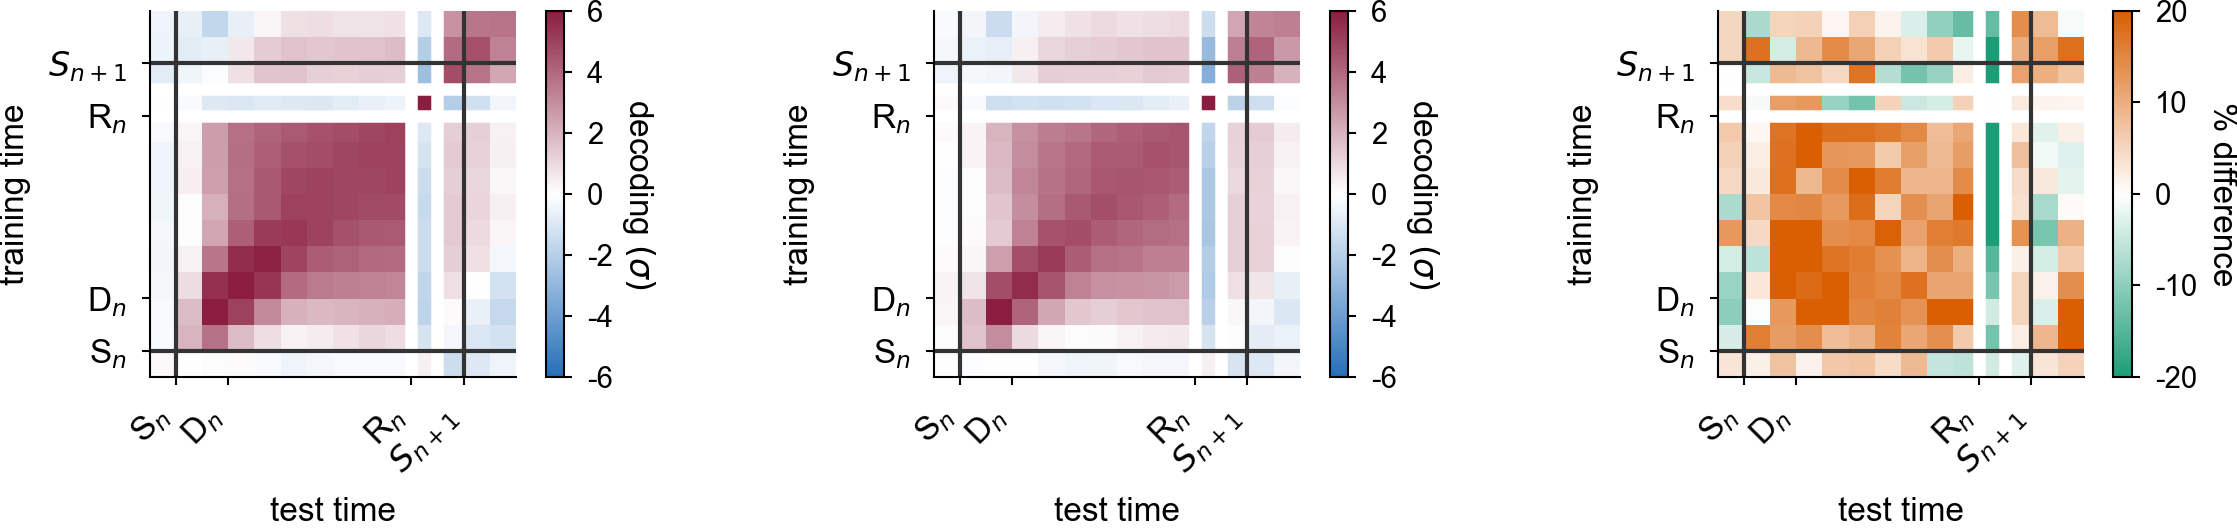

In [11]:
# AVERAGE ACROSS MONKEYS
conditions = ['z_contra', 'z_ipsi', 'percent_z_diff_abs']
cbarlabel=['decoding $(\sigma)$', 'decoding $(\sigma)$', '% difference']
vmaxs=[6, 6, 20]

cmaps = [left_right_cmap, left_right_cmap, ipsi_contra_cmap]

borders_all = [df_meancrossv.borders_full[i] for i in df_meancrossv.index]

borders_diff = np.min([np.diff(borders_all[i]) for i in range(len(borders_all))],axis=0)
borders_mean = np.append(0,np.cumsum(borders_diff))#add one more 0 at start so borders and diff add up

# exclude: start front-aligned, delay back-aligned, saccade front-aligned, end front-aligned  
excludetimes = [0,5, 7,9,11]
borders_choose = [borders_diff[i] for i in range(len(borders_diff[:15])) if i not in excludetimes]
# format: start_back:0, fix:1, targon:2, targoff:3, delay_front:4, || 
#         sacc_back:5, end_front:6, ||
#         start_back2:7, fix2:8, targon2:9, targoff2:10
borders_mean_choose = np.append(0,np.cumsum(borders_choose))

session_avg = {cond: np.zeros((len(df_meancrossv.index), np.sum(borders_choose), np.sum(borders_choose)))\
                   for cond in conditions}

f, ax = plt.subplots(1,3, figsize=(8., 2))
f.autofmt_xdate(rotation=45)

    
for c, cond in enumerate(conditions):
    for sess, s in enumerate(df_meancrossv.index):
        helper=[]
        for idxtrain,timingtrain in enumerate(df_meancrossv.borders_full[sess][:15]):
            # if training front aligned
            if (idxtrain not in excludetimes): 
                helper.append(np.concatenate([df_meancrossv[cond][sess][timingtrain:timingtrain+borders_diff[idxtrain],\
                                         timingtest:timingtest+borders_diff[idxtest]]\
                             for idxtest,timingtest in enumerate(df_meancrossv.borders_full[sess][:15])\
                                             if (idxtest not in excludetimes)], axis=1))

        session_avg[cond][sess] = np.concatenate(helper)

    im = ax[c].imshow(np.nanmean(session_avg[cond], axis=0), vmin = -vmaxs[c], vmax = vmaxs[c],\
                     origin='lower',cmap=cmaps[c])

    cbar = plt.colorbar(im, ax=ax[c])
    cbar.set_label(cbarlabel[c], rotation=270, verticalalignment='baseline')
    cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    # mark time periods
    color='#333333'
    linestyle='-'
    for i in [5,7,2,9]:
        if (i==5) | (i==7): # where data is cut
            linewidth, color = 3, 'w'
        else: # stimulus start for each trial
            linewidth, color = 1, '#333333'
        ax[c].axhline(borders_mean_choose[i]-0.5, color=color, linewidth=linewidth, linestyle=linestyle)
        ax[c].axvline(borders_mean_choose[i]-0.5, color=color, linewidth=linewidth, linestyle=linestyle)

    # labels
    timings = [(borders_mean_choose[i]-0.5) for i in [2,3,4,9]]
    timings_labels = ['S$_n$', 'D$_n$', 'R$_n$',  '$S_{n+1}$']
    ax[c].set_xticks(timings)
    ax[c].set_xticklabels(timings_labels, fontsize=8)
    ax[c].set_yticks(timings)
    ax[c].set_yticklabels(timings_labels, fontsize=8)
    ax[c].set_ylabel('training time')
    ax[c].set_xlabel('test time')
    #ax[c].set_title(cond+', average')

plt.tight_layout()
#plt.savefig('./Figures/Figure2/DecoderMatrices_acrossMonkeys.svg')


In [12]:
if cond == 'angle_improvement':
    angle_delay = [np.mean(df_meancrossv[cond][s][borders_all[s][4]:borders_all[s][6],\
                                                    borders_all[s][4]:borders_all[s][6]])\
                                    for s in df_meancrossv.index]
    print('Avg. contra>ipsi delay error: '+str(np.round(np.mean(angle_delay),2))+'°')
elif cond == 'percent_z_diff_abs':
    percent_delay = [np.nanmean(df_meancrossv[cond][s][borders_all[s][4]:borders_all[s][6],\
                                                    borders_all[s][4]:borders_all[s][6]])\
                                    for s in df_meancrossv.index]
    print('Avg. contra>ipsi percentage: '+str(np.round(np.nanmean(percent_delay), 2))+'%')

Avg. contra>ipsi percentage: 14.94%


---

# Delay decoder 

In [13]:
with open('./Results/Figure2/DelayDecoder_200ms.pickle', 'rb') as handle:
    df_delay = pickle.load(handle)
bins = 200/1000

df_delay['session_continuous'] = df_delay.monkey + df_delay.session.astype(str)



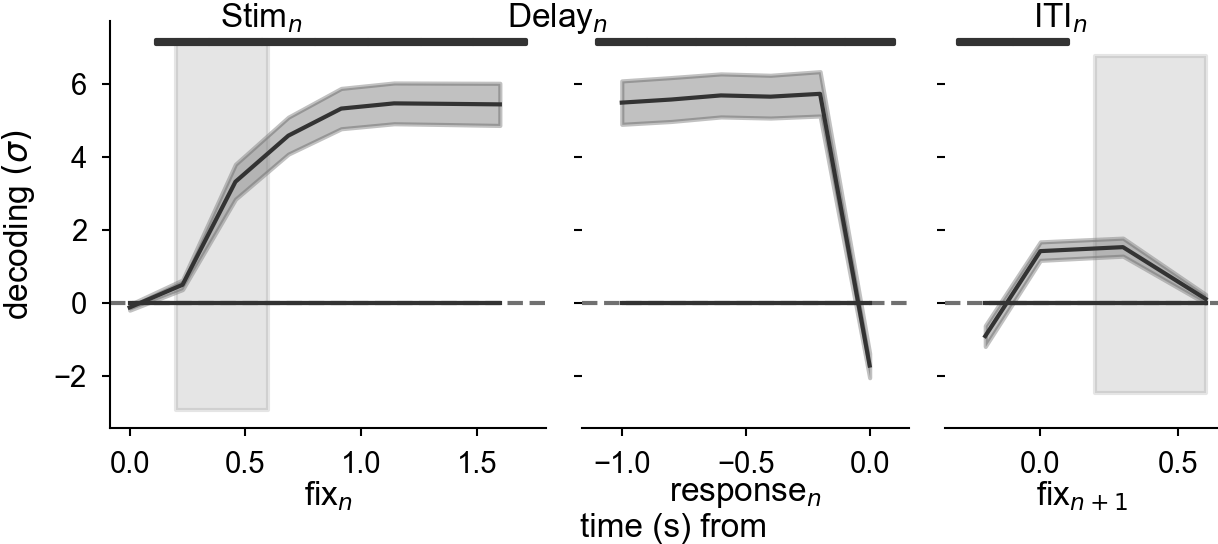

In [14]:
df_mono = df_delay.loc[(df_delay.session_continuous!='Pe2')]
df_mono.reset_index(inplace=True, drop=True)  

borders = np.array([np.array(df_mono.borders_full[i]) for i in df_mono.index])

# left hemisphere
acc_timealigned,borders_mean = cut_task_timings(df_mono.msacc_basecorrected_prev_combined, borders, 15)

plot_twolines_full(R=acc_timealigned, base=np.zeros((acc_timealigned.shape)), bins=bins,\
                      labelR='',labelB='', errorbars='SEM',shorten_delay =2,\
                             borders=borders_mean, ylabel='decoding $(\sigma)$', colors=['#333333', '#333333'])

plt.tight_layout()
#plt.savefig('./Figures/Figure2/DelayDecoder200msboth_all'+'.png')


### ipsi vs contra, Fig 2h

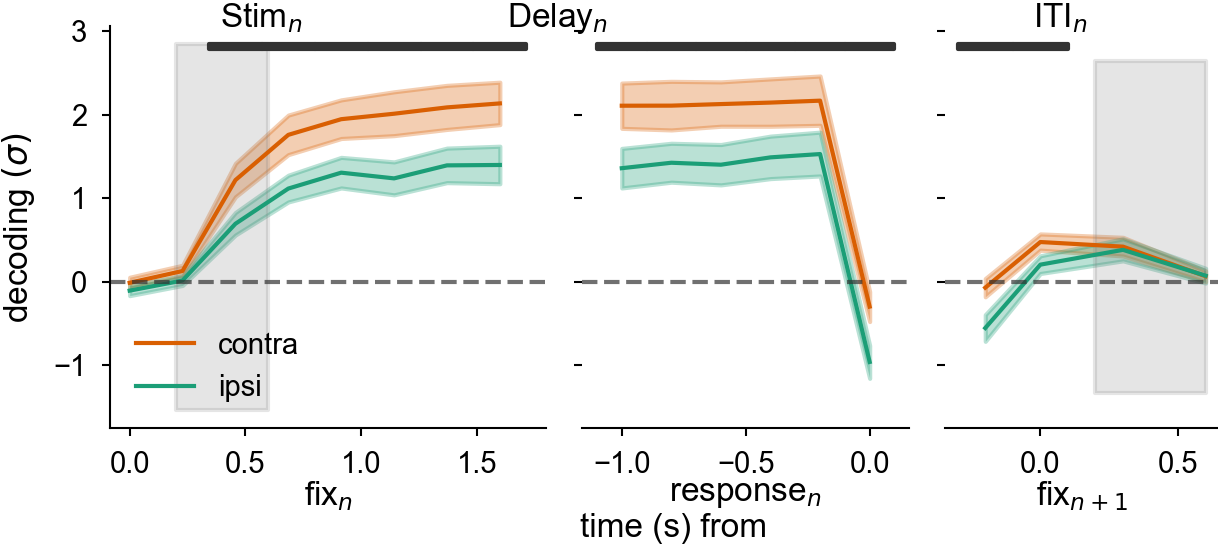

In [15]:
df_mono = df_delay.loc[(df_delay.session_continuous!='Pe2')]
df_mono.reset_index(inplace=True, drop=True)  

borders = np.array([np.array(df_mono.borders_full[i]) for i in df_mono.index])

# cut together based on task timing 
hemis_lr = ['ipsi_left', 'contra_left', 'ipsi_right', 'contra_right']
acc = {hemi: [] for hemi in hemis_lr}
for hemi in hemis_lr:
    acc[hemi],borders_mean = cut_task_timings(df_mono['msacc_basecorrected_prev_'+hemi], borders, 15)

# average left and right hemisphere predictions
acc_timealigned_ipsi_acrossMonkeys = np.mean([acc['ipsi_left'], acc['ipsi_right']], axis=0)
acc_timealigned_contra_acrossMonkeys = np.mean([acc['contra_left'], acc['contra_right']], axis=0)

plot_twolines_full(R=acc_timealigned_contra_acrossMonkeys,base=acc_timealigned_ipsi_acrossMonkeys, bins=bins,\
                      labelR='contra',labelB='ipsi', errorbars='SEM',shorten_delay =2,\
                             borders=borders_mean, ylabel='decoding $(\sigma)$',\
                   colors=[colors['Contralateral'], colors['Ipsilateral']])
plt.tight_layout()
#plt.savefig('./Figures/Figure2/DelayDecoder200ms_all'+'.svg')


In [16]:
delay_ipsi = np.mean(acc_timealigned_ipsi_acrossMonkeys[:,borders_mean[4]:borders_mean[6]], axis=1)
delay_contra = np.mean(acc_timealigned_contra_acrossMonkeys[:,borders_mean[4]:borders_mean[6]], axis=1)

react_ipsi = np.mean(acc_timealigned_ipsi_acrossMonkeys[:,borders_mean[13]:borders_mean[15]], axis=1)
react_contra = np.mean(acc_timealigned_contra_acrossMonkeys[:,borders_mean[13]:borders_mean[15]], axis=1)


print('Ipsi: '+str(ttest_1samp(react_ipsi, 0, nan_policy='omit')))
print('Contra: '+str(ttest_1samp(react_contra, 0, nan_policy='omit')))
print('Contra-Ipsi: '+str(ttest_rel(react_contra, react_ipsi, nan_policy='omit')))

Ipsi: Ttest_1sampResult(statistic=2.535686535491056, pvalue=0.016141525469339345)
Contra: Ttest_1sampResult(statistic=4.862848925902275, pvalue=2.7617512934895293e-05)
Contra-Ipsi: Ttest_relResult(statistic=1.803237206272936, pvalue=0.08048872934771087)
